In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.15.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
# Part 2 - Now let's make the ANN!

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [11]:
# Initialising the ANN
classifier = Sequential()

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [15]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model_history=classifier.fit(X_train,y_train,validation_split=0.30,batch_size=10,epochs=25)

Epoch 1/25


560/560 [==============================] - 3s 4ms/step - loss: 1.8037 - accuracy: 0.7121 - val_loss: 1.3487 - val_accuracy: 0.7504
Epoch 2/25
560/560 [==============================] - 2s 3ms/step - loss: 1.1959 - accuracy: 0.7770 - val_loss: 1.1438 - val_accuracy: 0.7671
Epoch 3/25
560/560 [==============================] - 2s 3ms/step - loss: 0.7565 - accuracy: 0.7680 - val_loss: 0.6443 - val_accuracy: 0.7679
Epoch 4/25
560/560 [==============================] - 2s 3ms/step - loss: 0.5545 - accuracy: 0.7923 - val_loss: 0.5489 - val_accuracy: 0.7817
Epoch 5/25
560/560 [==============================] - 2s 3ms/step - loss: 0.4914 - accuracy: 0.8036 - val_loss: 0.5002 - val_accuracy: 0.7950
Epoch 6/25
560/560 [==============================] - 2s 3ms/step - loss: 0.4582 - accuracy: 0.8105 - val_loss: 0.4753 - val_accuracy: 0.8012
Epoch 7/25
560/560 [==============================] - 2s 3ms/step - loss: 0.4445 - accuracy: 0.8152 - val_loss: 0.4726 - val_accuracy: 0.8025
Epoc

In [17]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


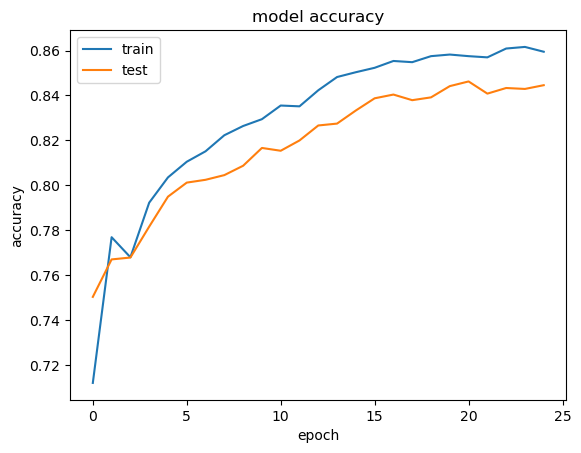

In [18]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

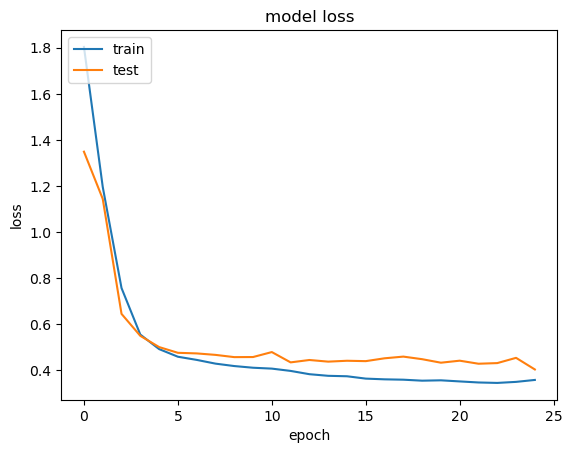

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [21]:
pip install --upgrade scikit-learn


     ---------------------------------------- 9.3/9.3 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\BiT-LAB_2\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



63/63 [==============================] - 0s 2ms/step


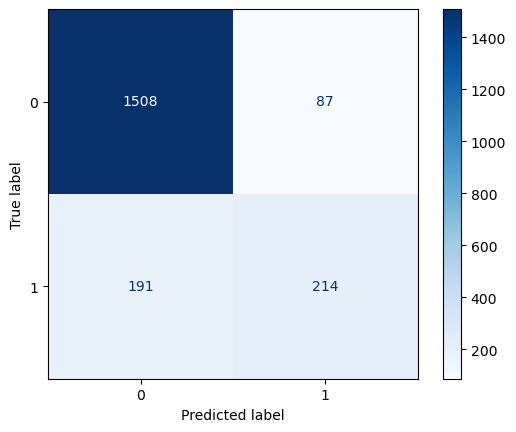

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = classifier.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Provide the class labels manually
disp.plot(cmap='Blues')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score

# Assuming 'classifier' is your trained classifier
y_pred = classifier.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
score = accuracy_score(y_test, y_pred_binary)


63/63 [==============================] - 0s 2ms/step


In [24]:
score

0.861